In [1]:
!pip install evaluate
!pip install datasets
!pip install accelerate==0.27.2
!pip install transformers[torch]
!pip install rouge_score
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.28.0
    Uninstalling accelerate-0.28.0:
      Successfully uninstalled accelerate-0.28.0
  Preparing metadata (setup.py) ... - done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=a5d32a035d5e0d0606968f0547b089f60eb46c9bbb89527a48fb847baa5f95af
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import transformers 

2024-05-14 14:48:09.408272: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 14:48:09.408417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 14:48:09.491898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# model_ckpt = "facebook/bart-large-cnn"
# model_ckpt = "ainize/bart-base-cnn"
model_ckpt = "facebook/bart-base"
# model_ckpt = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

samsum = load_dataset("samsum")
samsum

cuda


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Dataset samsum downloaded and prepared to /root/.cache/huggingface/datasets/samsum/samsum/0.0.0/3f7dba43be72ab10ca66a2e0f8547b3590e96c2bd9f2cbb1f6bb1ec1f1488ba6. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [4]:
print(model)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 768, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 768, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0-5): 6 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): LayerNorm((768,), 

In [5]:
samsum["train"][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

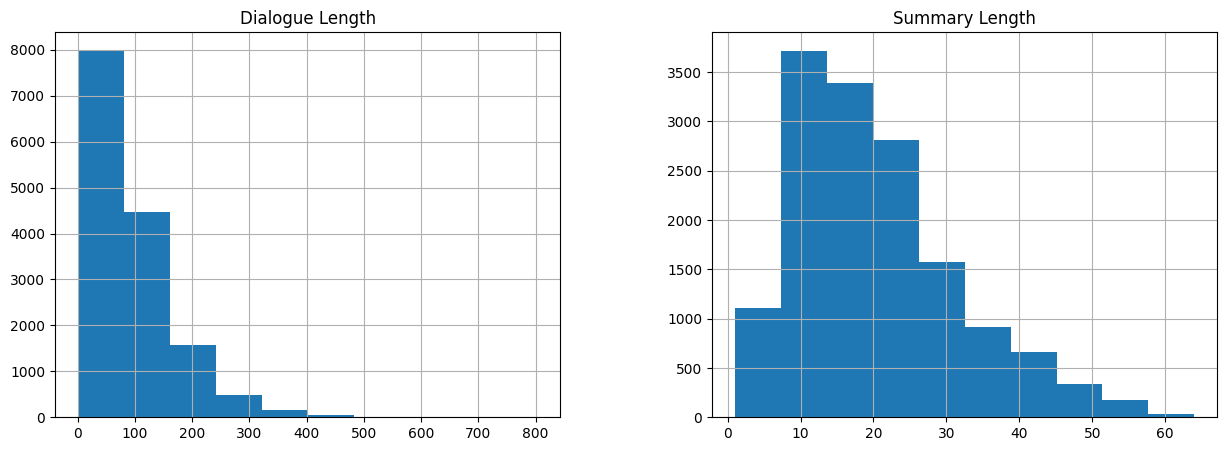

In [6]:
import pandas as pd

dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

# print(dialogue_len)
# print(summary_len)
data = pd.DataFrame([dialogue_len, summary_len]).T
data.columns = ['Dialogue Length', 'Summary Length']

data.hist(figsize = (15,5))

In [7]:
# let's build Data Collator
def get_feature(batch):
  encodings = tokenizer(batch['dialogue'],
                        max_length = 512,
                        padding = "max_length",
#                         return_tensors="pt",
                        truncation = True)
  encoding_labels = tokenizer(batch["summary"],
                            max_length = 128,
                            padding = "max_length",
#                             return_tensors="pt",
                            truncation = True)
  # print(encodings["labels"])
  encodings = {
      "input_ids": encodings['input_ids'],
      "attention_mask": encodings["attention_mask"],
      "labels": encoding_labels['input_ids']
  }
  return encodings

samsum_pt = samsum.map(get_feature,
                       remove_columns = samsum["train"].column_names,
                       batched = True)
# samsum_pt.set_format(type="torch")
samsum_pt

  0%|          | 0/15 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [8]:
print(samsum_pt["train"])

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 14732
})


In [9]:
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq
import evaluate
import numpy as np
from tqdm import tqdm

rouge = evaluate.load("rouge")
data_collator = DataCollatorForSeq2Seq(tokenizer, model = model)

def compute_metrics_test(dataset, model, tokenizer, metric):
  dialogue = dataset["dialogue"]
  target = dataset["summary"]

  inputs = tokenizer(dialogue, max_length = 512, truncation=True, padding = "max_length", return_tensors = "pt")

  predictions = model.generate(
      input_ids = inputs["input_ids"].to(device),
      attention_mask = inputs["attention_mask"].to(device),
      length_penalty = 0.8,
      num_beams = 8,
      max_length = 128
  )
  decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens = True)

  scores = rouge.compute(predictions = decoded_preds, references = target)
  print(scores)


def compute_metrics(eval_preds):
  predictions, labels = eval_preds
  # print(f'Predictions: {predictions}')
  # print(f'Labels: {labels}')
  decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens = True)
  labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
  decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

  result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
  return result

In [10]:
def calculate_metric_on_test(dataset, model, tokenizer, device, metric):
  inputs = tokenizer(dataset["dialogue"], max_length = 1024, truncation = True,
                    padding = "max_length", return_tensors = "pt")
  summaries = model.generate(input_ids = inputs["input_ids"].to(device),
                             attention_mask = inputs["attention_mask"].to(device),
                             max_length = 124, length_penalty = 0.8, num_beams = 2)
  decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]
  score = metric.compute(predictions=decoded_summaries, references=dataset["summary"])
  results = {k: v.mid.fmeasure*100 for k,v in score.items()}
  return results

In [11]:
from datasets import load_metric
rouge_metric = load_metric('rouge')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
score = calculate_metric_on_test(dataset = samsum["test"][1:100], model = model.to(device),
                            tokenizer = tokenizer, metric = rouge_metric, device = device)

cuda


In [12]:
print(score)

{'rouge1': 23.66335596048242, 'rouge2': 7.355041414973526, 'rougeL': 17.784342491859213, 'rougeLsum': 17.799847778446345}


In [13]:
import os
os.environ["WANDB_DISABLED"] = "true"
training_args = Seq2SeqTrainingArguments(
    output_dir = "bart_samsum",
    num_train_epochs = 3,
    evaluation_strategy="steps",
    save_strategy = "epoch",
    eval_steps=500,
    logging_steps = 500,
    learning_rate = 3e-5,
    weight_decay = 0.01,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size = 4,
#     load_best_model_at_end=True,
    predict_with_generate = True,
    report_to = None
)

trainer = Seq2SeqTrainer(
    model = model,
    args = training_args,
    train_dataset = samsum_pt["train"],
    eval_dataset = samsum_pt["validation"],
    data_collator = data_collator,
    tokenizer = tokenizer,
    compute_metrics = compute_metrics
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [14]:
trainer.train()

Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
500,1.216800,0.393076,0.447126,0.211398,0.374661,0.374346
1000,0.421300,0.367661,0.461578,0.228035,0.389041,0.388686
1500,0.410800,0.360771,0.464044,0.221333,0.387902,0.387793
2000,0.408700,0.355066,0.463094,0.232432,0.391420,0.391579
2500,0.407300,0.346767,0.466910,0.237322,0.398218,0.398342
3000,0.384500,0.340599,0.466846,0.240815,0.398616,0.398623
3500,0.379100,0.342941,0.475818,0.239688,0.401474,0.401303
4000,0.351100,0.338221,0.481140,0.251995,0.411301,0.411105
4500,0.336200,0.339476,0.475925,0.247885,0.404788,0.404423
5000,0.323700,0.334577,0.483980,0.251362,0.411360,0.411166


/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warning

TrainOutput(global_step=11049, training_loss=0.3762102204757057, metrics={'train_runtime': 4001.297, 'train_samples_per_second': 11.045, 'train_steps_per_second': 2.761, 'total_flos': 1.347395625418752e+16, 'train_loss': 0.3762102204757057, 'epoch': 3.0})

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

model.save_pretrained("/kaggle/working/bart-base_samsum_model")
tokenizer.save_pretrained("/kaggle/working/bart-base_samsum_tokenizer")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


('/kaggle/working/bart-base_samsum_tokenizer/tokenizer_config.json',
 '/kaggle/working/bart-base_samsum_tokenizer/special_tokens_map.json',
 '/kaggle/working/bart-base_samsum_tokenizer/vocab.json',
 '/kaggle/working/bart-base_samsum_tokenizer/merges.txt',
 '/kaggle/working/bart-base_samsum_tokenizer/added_tokens.json',
 '/kaggle/working/bart-base_samsum_tokenizer/tokenizer.json')

In [16]:
tokenizer_saved = AutoTokenizer.from_pretrained("/kaggle/working/bart-base_samsum_tokenizer")
model_saved = AutoModelForSeq2SeqLM.from_pretrained("/kaggle/working/bart-base_samsum_model")

score = calculate_metric_on_test(dataset = samsum["test"][1:100], model = model_saved.to(device),
                            tokenizer = tokenizer_saved, metric = rouge_metric, device = device)

In [17]:
print(score)

{'rouge1': 47.852734531191665, 'rouge2': 21.994671306715365, 'rougeL': 38.767552971670796, 'rougeLsum': 38.80298464511043}
